### DECISION TREES

### Program-2:


In [1]:
#Importing necessary libraries:
import numpy as np
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as DTC,DecisionTreeRegressor as DTR, export_graphviz
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score
from sklearn import metrics

#### a. Fit a classifier model using logistic regression on the training set.

In [2]:
#Loading the data
from sklearn.datasets import load_iris
#Iris dataset:
iris = load_iris()


In [3]:
#Splitting into features and target variable:
X, y = iris.data, iris.target

#Train and Test Data
X_train, X_test, y_train, y_test = tts(X,y,test_size=0.3,random_state=1)

#Iris has categorical target variable with target classes: setosa, versicolor, virginica.

In [4]:
#Fitting the logistic regression model
log=LogR().fit(X_train, y_train)
predicted = log.predict(X_test)

In [5]:
train_acc_log = log.score(X_train, y_train)
test_acc_log = log.score(X_test, y_test)
print("Training accuracy for Logistic Regression: " ,train_acc_log)
print("Testing accuracy for Logistic Regression: ", test_acc_log)

Training accuracy for Logistic Regression:  0.9809523809523809
Testing accuracy for Logistic Regression:  0.9777777777777777


#### b. Compare the training and testing error with the Decision Tree classifier for Program-01.


In [6]:
#Fitting the best model obtained in Program-1
a= DTC(max_depth=3)
clf_best = a.fit(X_train, y_train)

In [11]:
train_acc_dtc = clf_best.score(X_train, y_train)
test_acc_dtc = clf_best.score(X_test, y_test)
print("Training accuracy for Decision Tree Classifier: " ,train_acc_dtc)
print("Testing accuracy for Decision Tree Classifier: ", test_acc_dtc)

Training accuracy for Decision Tree Classifier:  0.9809523809523809
Testing accuracy for Decision Tree Classifier:  0.9555555555555556


In [12]:
test_err_log = 1 - test_acc_log
train_err_log =  1- train_acc_log
print("Training error of Logistic Regression model:", train_err_log)
print("Testing error Logistic Regression model:", test_err_log)

Training error of Logistic Regression model: 0.01904761904761909
Testing error Logistic Regression model: 0.022222222222222254


In [13]:
test_err_dtc = 1 - test_acc_dtc
train_err_dtc =  1- train_acc_dtc
print("Training error of Decision Tree Classifier:", train_err_dtc)
print("Testing error Decision Tree Classifier:", test_err_dtc)

Training error of Decision Tree Classifier: 0.01904761904761909
Testing error Decision Tree Classifier: 0.0444444444444444


Logistic regression model performs slightly better than the decision tree classifier as testing error in the logistic regression model (0.0222) is lesser than the testing error in decision tree classifier ( 0.0444).

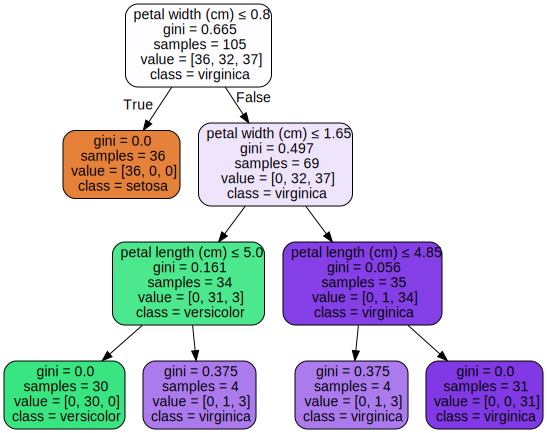

In [10]:
#Plotting the tree
dot_data = export_graphviz(clf_best, out_file=None, 
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 